In [ ]:
import cv2
import math
import argparse
import matplotlib.pyplot as plt
import numpy as np
import threading

In [ ]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


def plt_plot(x):
    ax.hist(x, bins=4)
    plt.show()

In [ ]:
parser=argparse.ArgumentParser()
parser.add_argument('--image')

parser.add_argument('--device', default='0,1', type=str, help='设置使用哪些显卡')
parser.add_argument('--no_cuda', action='store_true', help='不适用GPU进行训练')
args = parser.parse_args(args=['--device', '0',  '--no_cuda'])
# args = parser.parse_args()

faceProto="opencv_face_detector.pbtxt"
faceModel="opencv_face_detector_uint8.pb"
ageProto="age_deploy.prototxt"
ageModel="age_net.caffemodel"
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

video=cv2.VideoCapture(args.image if args.image else 0)
padding=20

In [ ]:
people_cunt = 0
fig = plt.figure()
fig.add_subplot(1, 1, 1)
count_list = []
while True:
    hasFrame,frame=video.read()
    if not hasFrame:
        cv2.waitKey()
#         print('no frame')
        break
    
    resultImg,faceBoxes=highlightFace(faceNet,frame)
    if not faceBoxes:
        cv2.imshow("Detecting age and gender", resultImg)
#         print("No face detected")
    people_cunt = people_cunt + len(faceBoxes)    
    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):
                   min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                   :min(faceBox[2]+padding, frame.shape[1]-1)]

        try:
            blob=cv2.dnn.blobFromImage(face, 1.0, (228,228), MODEL_MEAN_VALUES, swapRB=False)
        except:
            continue

        genderNet.setInput(blob)
        genderPreds=genderNet.forward()
        gender=genderList[genderPreds[0].argmax()]
        # print(f'Gender: {gender}')


        ageNet.setInput(blob)
        agePreds=ageNet.forward()
        age=ageList[agePreds[0].argmax()]
        # print(f'Age: {age[1:-1]} years')

        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
        cv2.putText(resultImg, f'people_cunt:{people_cunt}', (50,20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow("Detecting age and gender", resultImg)
    
    count_list.append(people_cunt)
    print(count_list)
    plt.hist(count_list, bins=10)
    plt.draw()
    plt.show()
    people_cunt = 0
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


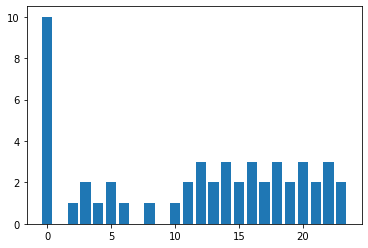

In [15]:
import matplotlib.pyplot as plt
import numpy as np
data = [(0, 10), (1, 0), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 0), (8, 1), (9, 0), (10, 1), (11, 2), (12, 3), (13, 2), (14, 3), (15, 2), (16, 3), (17, 2), (18, 3), (19, 2), (20, 3), (21, 2), (22, 3),(23, 2)]
x = [i for i,j in data]
y = [j for i,j in data]
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.bar(x,y)
plt.show()








In [1]:
import matplotlib
matplotlib.use('TkAgg')

import numpy as np
import cv2
import matplotlib.pyplot as plt

fig = plt.figure()
cap = cv2.VideoCapture(0)


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


line1, = plt.plot(x1, y1, 'ko-')        # so that we can update data later

for i in range(1000):
    # update data
    line1.set_ydata(np.cos(2 * np.pi * (x1+i*3.14/2) ) * np.exp(-x1) )

    # redraw the canvas
    fig.canvas.draw()

    # convert canvas to image
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # img is rgb, convert to opencv's default bgr
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)


    # display image with opencv or any operation you like
    cv2.imshow("plot",img)

    # display camera feed
    ret,frame = cap.read()
    cv2.imshow("cam",frame)

    k = cv2.waitKey(33) & 0xFF
    if k == 27:
        break


c:\users\allen\.conda\envs\tf14\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
